In [33]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

In [34]:
dataset_df = pd.read_csv('/content/sample_data/train.csv')
dataset_df.shape

(1460, 81)

In [36]:
dataset_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [37]:
dataset_df = dataset_df.drop('Id', axis = 1)
dataset_df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [38]:
dataset_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

House Price Distribution

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<ipython-input-39-ca797a04c467>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha' : 0.4});


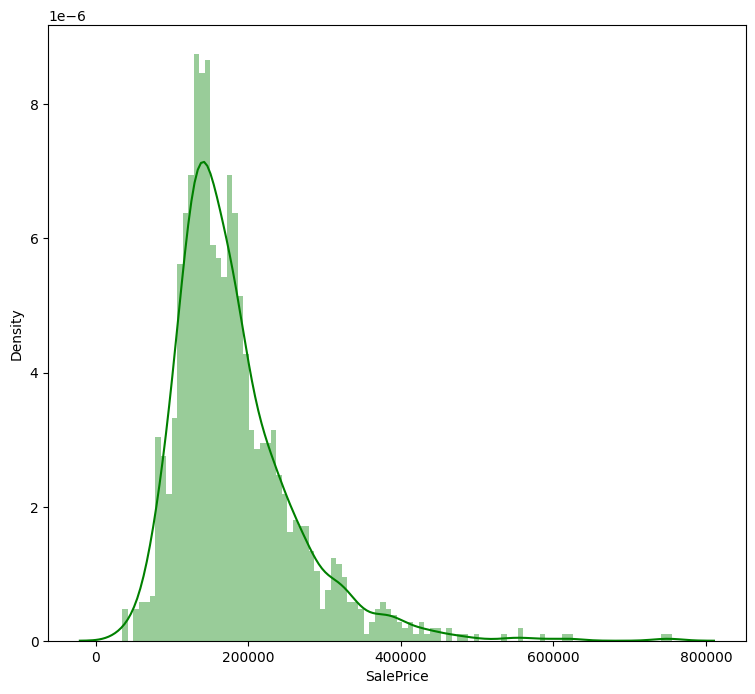

In [39]:
print(dataset_df['SalePrice'].describe())
plt.figure(figsize=(9,8))
sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha' : 0.4});

Numerical data distribution

In [40]:
list(set(dataset_df.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

In [41]:
df_num = dataset_df.select_dtypes(include=['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

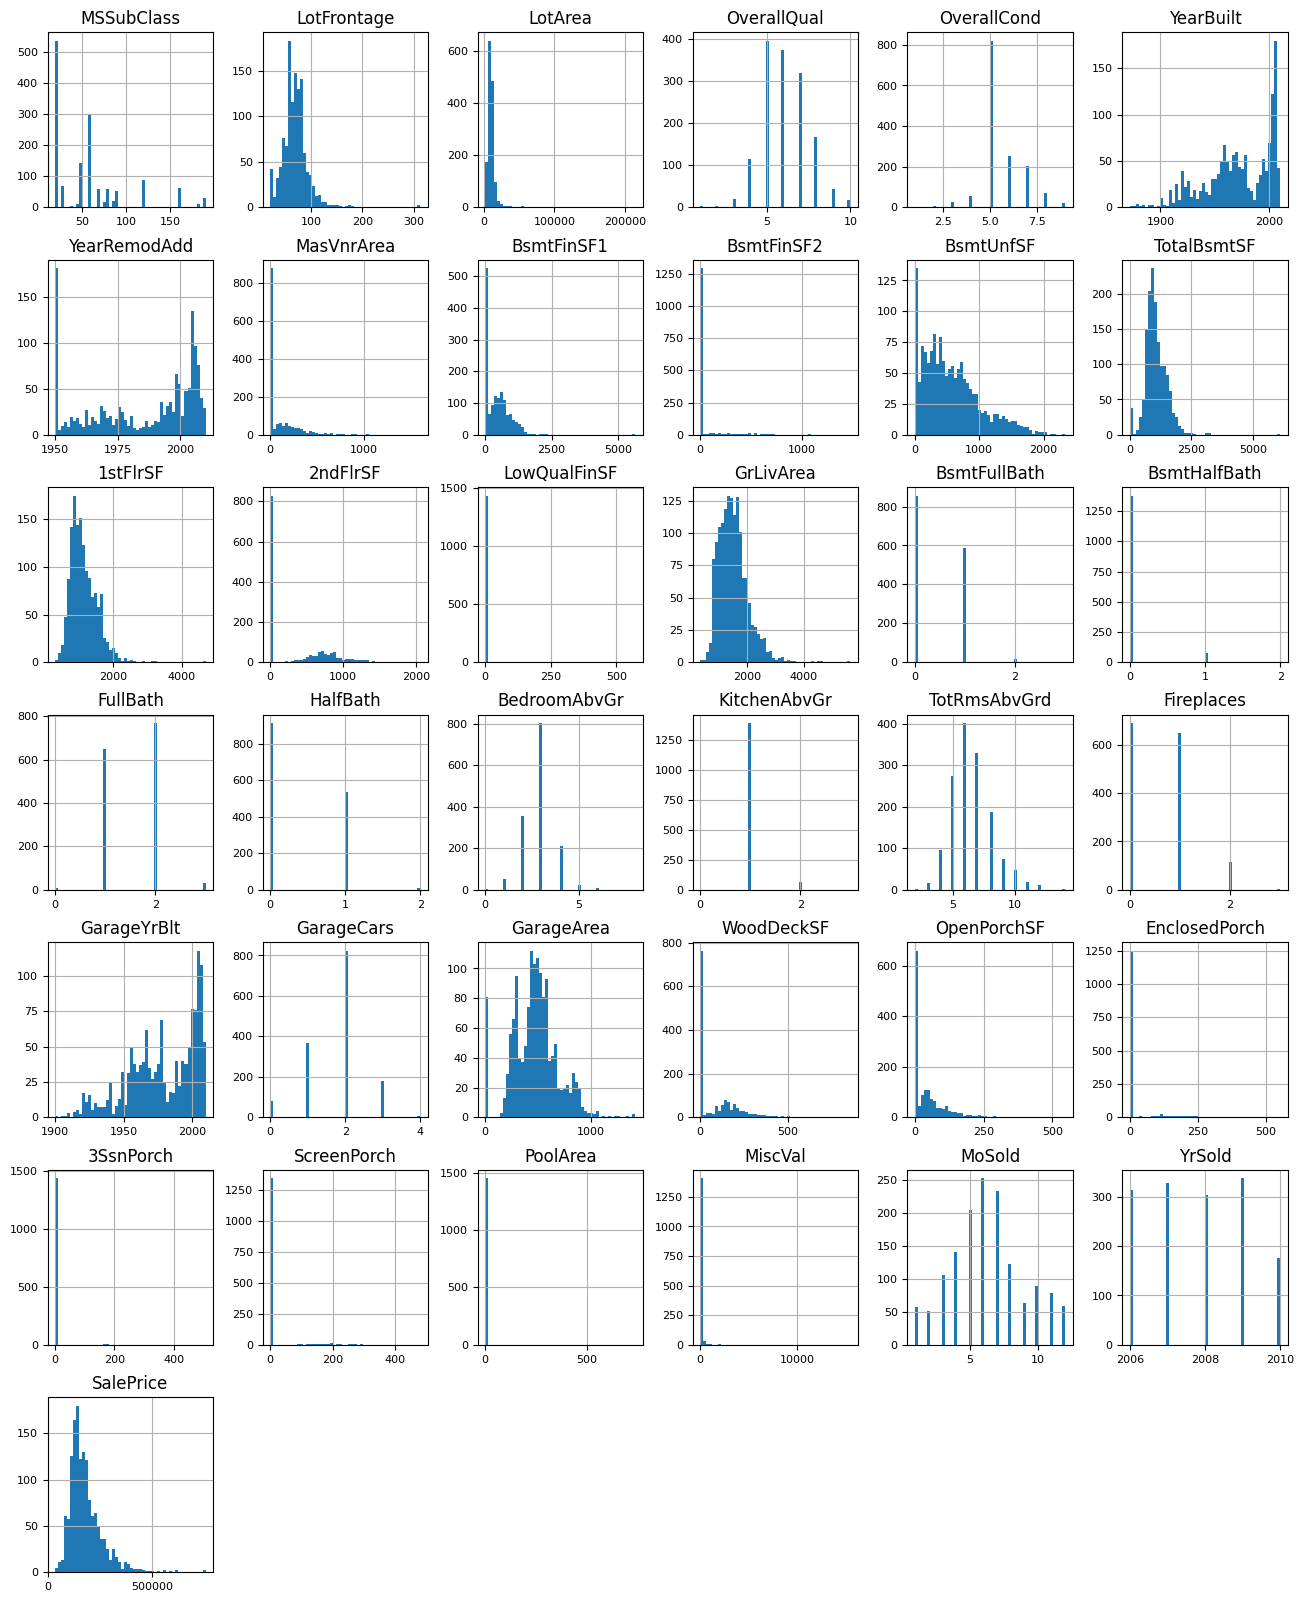

In [42]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

Prepare the dataset

In [20]:
import numpy as np

def split_dataset(dataset, test_ratio=0.30):
    test_indices = np.random.rand(len(dataset)) < test_ratio
    return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(dataset_df)
print("{} examples in training, {} examples in testing.".format(len(train_ds_pd), len(valid_ds_pd)))

1032 examples in training, 428 examples in testing.


In [21]:
# Training data preparation
X_train = train_ds_pd.drop(columns=['SalePrice'])
y_train = train_ds_pd['SalePrice']

# Validation data preparation
X_valid = valid_ds_pd.drop(columns=['SalePrice'])
y_valid = valid_ds_pd['SalePrice']

Manejar valores faltantes primero

In [22]:
# Fill empty numeric features with the mean
for col in X_train.select_dtypes(include=['float64', 'int64']).columns:
    median_val = X_train[col].median()
    X_train[col].fillna(median_val, inplace=True)
    X_valid[col].fillna(median_val, inplace=True)

# Fill empty categorical features with the mode
for col in X_train.select_dtypes(include=['object']).columns:
    mode_val = X_train[col].mode()[0]
    X_train[col].fillna(mode_val, inplace=True)
    X_valid[col].fillna(mode_val, inplace=True)

<ipython-input-22-aed4951ce04a>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[col].fillna(median_val, inplace=True)
<ipython-input-22-aed4951ce04a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

One-hot encoder

In [23]:
X_train_encoded = pd.get_dummies(X_train)
X_valid_encoded = pd.get_dummies(X_valid)

# Make sure both sets contain the same columns
missing_cols = set(X_train_encoded.columns) - set(X_valid_encoded.columns)
for col in missing_cols:
    X_valid_encoded[col] = 0
X_valid_encoded = X_valid_encoded[X_train_encoded.columns]

Random Forest Model

In [24]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train_encoded, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [25]:
# Combine X_train and X_valid for codification
X_combined = pd.concat([X_train, X_valid], axis=0)

# Apply the One-hot encoding to X_combined
X_combined = pd.get_dummies(X_combined)

# Divide again to X_train and X_valid
X_train_encoded = X_combined.iloc[:X_train.shape[0], :]
X_valid_encoded = X_combined.iloc[X_train.shape[0]:, :]

# Now fit the model using X_train_encoded
rf.fit(X_train_encoded, y_train)

# Now try predicting using X_valid_encoded
y_pred = rf.predict(X_valid_encoded)
y_pred

array([167829.268, 216075.685, 147228.87 , 296534.557, 174120.735,
       219982.504, 155083.116, 235963.986, 140885.565, 136193.221,
       126331.428, 300297.797, 138765.986, 285229.753, 135420.646,
       137691.295, 291250.941, 244690.449, 128308.447, 136835.97 ,
       166638.47 , 208359.046, 121112.04 , 215836.43 ,  99131.316,
       318136.865, 186665.944, 246885.274, 114826.436, 204704.95 ,
       174576.193, 180307.802, 107079.01 , 122740.086, 141376.47 ,
       174176.357, 139759.933, 166868.927, 172718.926, 154074.639,
       259008.708, 132636.378, 154465.645, 114434.63 , 126266.024,
       111120.62 , 276749.99 , 141530.953, 116968.197, 333446.418,
       201543.325, 174658.728, 204162.17 , 168961.31 , 371619.889,
       271697.442, 194499.175, 122070.747, 153357.879, 263483.143,
       146931.053, 183058.328, 211929.589, 209689.589, 414826.359,
        98166.808, 320583.871, 191182.497, 126590.965, 229439.031,
       149708.804, 310549.191, 182725.384, 244350.255, 245477.

Variable importances

In [26]:
feature_importances = rf.feature_importances_
features_df = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Importance': feature_importances
})
features_df = features_df.sort_values(by='Importance', ascending=False)
features_df.head(10)  # Print the 10 most important features

,Feature,Importance
3,OverallQual,0.531467
15,GrLivArea,0.092089
11,TotalBsmtSF,0.043802
12,1stFlrSF,0.042881
8,BsmtFinSF1,0.041520
13,2ndFlrSF,0.031997
25,GarageCars,0.026422
26,GarageArea,0.020703
2,LotArea,0.010036
5,YearBuilt,0.009819


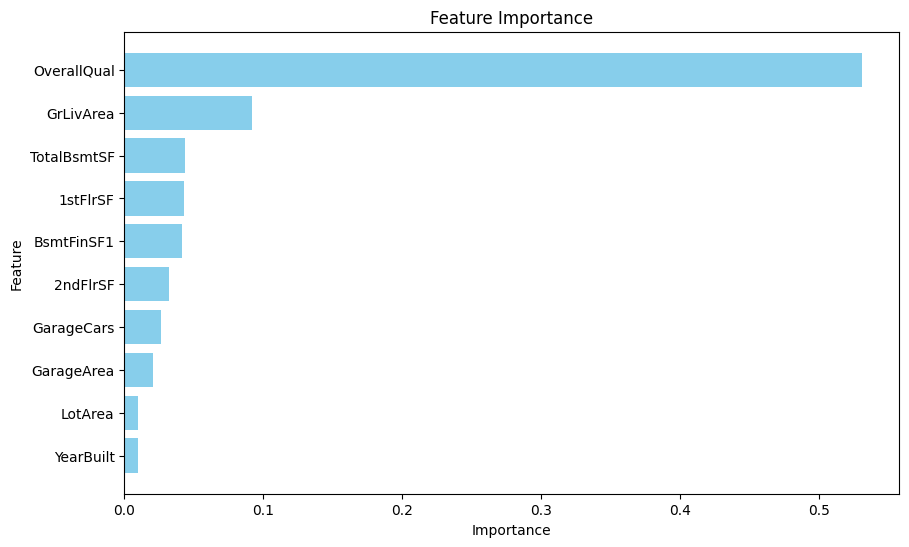

In [27]:
top_10 = features_df.sort_values(by="Importance", ascending=False).head(10)
top_10 = top_10.sort_values(by="Importance", ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(top_10["Feature"], top_10["Importance"], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

Metrics Evaluation

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [29]:
# Metrics evaluation
mse = mean_squared_error(y_valid, y_pred)
rmse = mean_squared_error(y_valid, y_pred, squared=False)
mae = mean_absolute_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

# Metrics evaluation dataframe
metrics_df = pd.DataFrame({
    'Métrica': ['MSE', 'RMSE', 'MAE', 'R^2'],
    'Valor': [mse, rmse, mae, r2]
})

metrics_df

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Métrica,Valor
0,MSE,7.525806e+08
1,RMSE,2.743320e+04
2,MAE,1.775589e+04
3,R^2,8.904536e-01


Evaluate the model

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


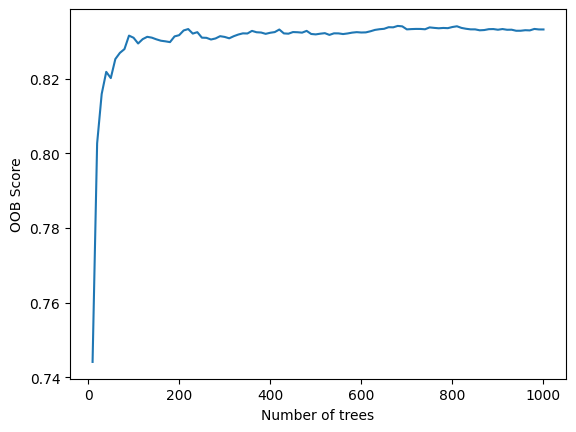

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Train Random Forest models with increasing number of trees and gather OOB scores
n_trees = list(range(10, 1001, 10))  # example range from 10 to 1000 trees
oob_scores = []

for n in n_trees:
    model = RandomForestRegressor(n_estimators=n, oob_score=True, random_state=42, n_jobs=-1)
    model.fit(X_train_encoded, y_train)
    oob_scores.append(model.oob_score_)

# Plot
plt.plot(n_trees, oob_scores)
plt.xlabel("Number of trees")
plt.ylabel("OOB Score")
plt.show()

Data Preparation on Test.csv

In [45]:
test_data = pd.read_csv('/content/sample_data/test.csv')
ids= test_data.pop('Id')

In [46]:
for col in test_data.select_dtypes(include=['float64', 'int64']):
    test_data[col].fillna(test_data[col].median(), inplace=True)

for col in test_data.select_dtypes(include=['object']):
    test_data[col].fillna(test_data[col].mode()[0], inplace=True)

<ipython-input-46-16f34890c150>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data[col].fillna(test_data[col].median(), inplace=True)
<ipython-input-46-16f34890c150>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [47]:
test_data.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,120,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0,0,Ex,MnPrv,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,0,Ex,MnPrv,Shed,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,Grvl,IR1,HLS,AllPub,Inside,...,144,0,Ex,MnPrv,Shed,0,1,2010,WD,Normal


In [48]:
test_df = pd.get_dummies(test_data, drop_first=True)

In [49]:
missing_cols = set(X_train.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0
test_df = test_df[X_train.columns]

In [50]:
for col in X_train.columns:
    if col not in test_df.columns:
        test_df[col] = 0

test_df = test_df[X_train.columns]

In [51]:
missing_in_test = set(X_train.columns) - set(test_df.columns)
print("Columns in X_train but not in test_df:")
print(missing_in_test)

extra_in_test = set(test_df.columns) - set(X_train.columns)
print("\nColumns in test_df but not in X_train:")
print(extra_in_test)

Columns in X_train but not in test_df:
set()

Columns in test_df but not in X_train:
set()


In [52]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_encoded
       , y_train)

RandomForestRegressor(random_state=42)

In [53]:
test_df = test_df[X_train.columns]

In [54]:
print(set(X_train.columns) == set(test_df.columns))

True


In [55]:
print(list(X_train.columns) == list(test_df.columns))

True


In [56]:
combined_df = pd.concat([X_train, test_data], axis=0).reset_index(drop=True)

combined_encoded = pd.get_dummies(combined_df)

X_train_encoded = combined_encoded.iloc[:len(X_train), :]
test_encoded = combined_encoded.iloc[len(X_train):, :]

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_encoded, y_train)

preds = rf.predict(test_encoded)

In [57]:
print(preds[:10])  # muestra las primeras 10 predicciones

[128294.74 154532.24 178472.35 182823.32 209194.56 181606.5  163065.12
 175950.81 182732.77 126795.5 ]


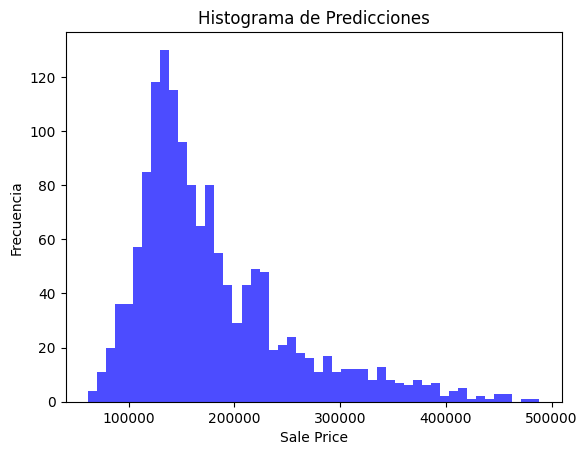

In [58]:
plt.hist(preds, bins=50, color='blue', alpha=0.7)
plt.title("Histograma de Predicciones")
plt.xlabel("Sale Price")
plt.ylabel("Frecuencia")
plt.show()

In [59]:
submission_df = pd.DataFrame({
    'Id': ids,
    'SalePrice': preds
})
submission_df.to_csv('submission.csv', index=False)

In [61]:
import pickle # Import the pickle module

# ... (rest of the code) ...

# Change 'classifier' to 'rf' to save the RandomForestRegressor model
pickle.dump(rf, open("modelbaru.pkl", "wb"))